<a href="https://colab.research.google.com/github/Pratik94229/Capstone-3/blob/main/Mobile_Price_Range_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Mobile Price Range Prediction







##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1** - Mattaparty Harish
##### **Team Member 2** - Pratik Thorat
##### **Team Member 3** - Aman Sharma

# **Project Summary -**

### Problem Overview

* Mobile Price Range Prediction data is a data set containing information regarding RAM, Camera, Mobile Weight, Price Range of different phones.

* Using the data given we had to build a model for predicting the price range of a mobile phone.

* To build a machine learning model, we first perform EDA with various plots for better visualization.

* And then we split it into a training set and a test set and applied various machine learning algorithms using the training data to train the model. Finally, we evaluated the model's performance on the test data to see how well it predicted sales.

### Analysis Performed

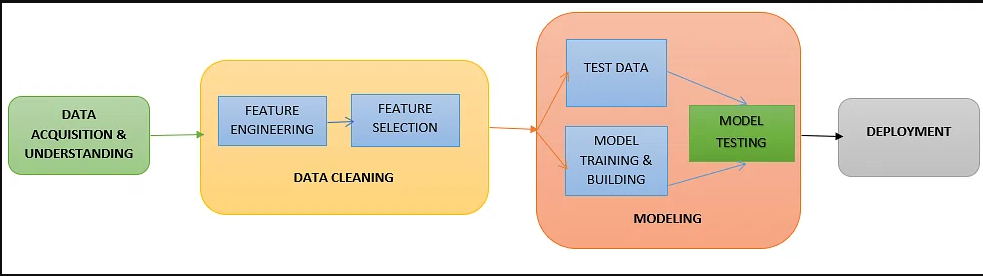

**Steps involved in building a ML Model:**

> Step 1: Data gathering and Understanding

> Step 2: Data preparation

> Step 3: Data Cleaning

> Step 4: Exploratory data analysis

> Step 5: Feature engineering and selection

> Step 6: ML Model assumption and checks

> Step 7: Data preparation for modelling

> Step 8: Model Building

> Step 9: Model Validation & Evaluation

> Step 10: Predictions & Saving model using pickel library.


**Libraries used in EDA & Machine Learning:**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Sklearn
7. Scipy


**Graphs used for representation:**
1. Bar plot
2. Pie plot
3. Box Plot
4. Grouped bar plot
5. Donut plot
6. Heatmap
7. Pair plot


**ML Models used for training & testing:**
1. Logistic Regression
2. KNN Classifier
3. Random Forest Classifier
4. XG Boost Classifier
5. Light GBM Classifier
6. CatBoost Classifier
7. SVM Classifier

**Insights from EDA impacting business:**

* Phones which are not having 3G don't have 4G connectivity as well.

* Phones which are not having Primary cam don't have front cam as well.

* Low price phones mostly fall under Rambin 1GB & very high cost phones fall under rambin of 3GB to 4GB.

* Very high cost phones have larger screen area & pixel area as well, resulting in better screen quality.

* Very high cost phones have larger battery size & mobile weight is lowest.

**Suggestions provided to increase the Sales:**

* Adequate amount of ram should be in lower range phones too for stabilized performance of phone which can effect the brand image in a positive way.

* There are many phones with no front cam through out all price ranges, atleast it should be present in all very high cost phones.


**ML Model selected for deployment: Logistic Regression**
> Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

> Although it is said Logistic regression is used for Binary Classification, it can be extended to solve multiclass classification problems as well.

**Advantages:**
* **Simple and easy to implement**: Logistic regression is a relatively simple statistical method that does not require much mathematical or statistical knowledge to use.

* **Works well with small datasets**: Logistic regression can work well with small datasets, which is often the case in many practical applications.

* **Interpretable results**: Logistic regression provides coefficients for each independent variable that can be interpreted as the change in the log odds of the dependent variable for a one-unit change in the independent variable.

* **Can handle both categorical and continuous variables**: Logistic regression can handle both categorical and continuous independent variables, making it a versatile method for modeling binary outcomes.

**Limitations:**

* **Assumes linearity**: Logistic regression assumes a linear relationship between the independent variables and the log odds of the dependent variable. If this assumption is violated, the results may be inaccurate.

* **Sensitive to outliers**: Logistic regression can be sensitive to outliers, which can have a significant impact on the results.


**Suggestion:**
* When we are dealing with huge datasets & above disavantages starts effecting the model, then using CatBoost Classifier can provide better results.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# ***Let's Begin !***

## ***Installing Required Libraries***

In [ ]:
# Installing catboost library
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.5 MB/s eta 0:00:00


In [ ]:
# For checking progress of Python code execution
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For applying AutoML
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 5.0 MB/s eta 0:00:00


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
from numpy import math

#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as x
from plotly.subplots import make_subplots


#For hypothesis testing
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn import svm

#For metric score calculation
from sklearn.metrics import confusion_matrix, classification_report

#For finding best model and hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model saving
import pickle

#Time remaining
from time import sleep
from tqdm import tqdm

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#For printing all the rows & columns in pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset Aman
working_dir='/content/drive/MyDrive/Data/'
dataset=pd.read_csv(working_dir + 'data_mobile_price_range.csv')

In [ ]:
# Load Dataset Harish
#working_dir='/content/drive/MyDrive/Almabetter/Module 3/Capstone project 3/'
#dataset=pd.read_csv(working_dir + 'data_mobile_price_range.csv')

In [ ]:
# # Load Dataset Pratik
# working_dir='/content/drive/MyDrive/Colab Notebooks/Module 3/Capstone project 3 (group)/'
# dataset=pd.read_csv(working_dir + 'data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(dataset)
plt.show()

### What did you know about your dataset?

####1) Dataset has 2000 rows & 21 columns.
####2) There are no Null values in the dataset.
####3) There are no Duplicate values in the dataset.
####4) Variables named 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen',  'wifi', 'price_range' has boolean values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

In [ ]:
# Dataset Describe
dataset.describe().T

### Variables Description 

* **Battery_power** - Battery capacity in mAh
* **Blue** - Has bluetooth or not
* **Clock_speed** - speed at which microprocessor executes instructions
* **Dual_sim** - Has dual sim support or not
* **Fc** - Front Camera Megapixels
* **Four_g** - Has 4G or not
* **Int_memory** - Internal Memory capacity
* **M_dep** - Mobile Depth in cm
* **Mobile_wt** - Weight of mobile phone
* **N_cores** - Number of cores in processor
* **Pc** - Primary Camera Megapixels
* **Px_heigh** - Pixel Resolution Height
* **Px_width** - Pixel Resolution Width
* **Ram** - Random Access Memory in MB
* **Touch_screen** - Has touch screen or not
* **Wifi** - Has wifi or not
* **Sc_h** - Screen Height in cm
* **Sc_w** - Screen Width in cm
* **Talk_time** - Longest time that a single battery charge will last over a call
* **Three_g** - Has 3G or not
* **Price_range** - This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f"Unique {i}'s count:{dataset[i].nunique()}\n--------------------------------------------------------------")
  if i in dataset.columns:
    if(dataset[i].nunique() < 25):
      print(f"Unique {i} Values \n{dataset[i].unique()}\n--------------------------------------------------------------")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Creating a copy of dataset for data wrangling 
df = dataset.copy()

In [ ]:
# Checking rows having zero values in pixel height
df[df['px_height']== 0].shape

In [ ]:
# Replacing zero values in pixel height with mean
df['px_height'] = df['px_height'].replace(0,df['px_height'].mean())

In [ ]:
# Checking rows having zero values in screen width
df[df['sc_w']== 0].shape

In [ ]:
# Replacing zero values in screen width with mean
df['sc_w'] = df['sc_w'].replace(0,df['sc_w'].mean())

In [ ]:
# Checking phones in each price range
price_range = df['price_range'].value_counts().reset_index().rename(columns={'index':'price_range','price_range':'counts'})
price_range

In [ ]:
# Checking phones having bluetooth
bluetooth = df.groupby(['price_range','blue'])['blue'].count().unstack()
bluetooth

In [ ]:
# Checking phones having 4G connectivity
four_g_avalibility=df['four_g'].value_counts().reset_index().rename(columns= {'index':'4G','four_g':'counts'})
four_g_avalibility

In [ ]:
# Checking phones having 3G connectivity
three_g_avalibility=df['three_g'].value_counts().reset_index().rename(columns= {'index':'3G','three_g':'counts'})
three_g_avalibility

In [ ]:
# Checking phones having wifi connectivity
wifi = df['wifi'].value_counts().reset_index().rename(columns= {'index':'wifi','wifi':'counts'})
wifi

In [ ]:
# Checking 4G & Wifi connectivity in phones according to price range
wifi_4g=df.groupby(['price_range'])['four_g','wifi'].sum()
wifi_4g

In [ ]:
# Creating new variables 'screen_area' & 'px_area'
df['screen_area'] = df['sc_h'] * df['sc_w']
df['px_area'] = df['px_height'] * df['px_width']

In [ ]:
# Average pixel area according to price range
pd.options.display.float_format = '{:.2f}'.format
df.groupby('price_range')['px_area'].mean().reset_index()

In [ ]:
# Checking phones having no front cam according to price range
no_fc = df[df['fc']== 0].groupby('price_range')['fc'].count().reset_index()
no_fc

In [ ]:
# Creating new boolean variables weather phones are having camera or not
df1 = df.copy()
df1['no_fc'] = df1['fc'].apply(lambda x: x if x == 0 else 1)
df1['no_pc'] = df1['pc'].apply(lambda x: x if x == 0 else 1)

In [ ]:
# Checking relation between front cam & primary cam
df1.groupby(['no_fc','no_pc'])['no_fc'].count().unstack()

In [ ]:
# Checking relation between 4G & 3G
df.groupby(['three_g','four_g'])['three_g'].count().unstack()

In [ ]:
# Function for checking relation between price range & other boolean variables
def price_range_and(a):
  return df.groupby(['price_range',a])[a].count().unstack()

In [ ]:
# Checking relation between price range & touch screen
price_range_and('touch_screen')

In [ ]:
# Checking relation between price range & wifi
price_range_and('wifi')

In [ ]:
# Checking relation between price range & 3G
price_range_and('three_g')

In [ ]:
# Checking relation between price range & 4G
price_range_and('four_g')

In [ ]:
# Checking relation between price range & bluetooth
price_range_and('blue')

In [ ]:
# Checking relation between price range & dual sim
price_range_and('dual_sim')

In [ ]:
# Checking phones having no primary cam according to price range
no_pc = df[df['pc']== 0].groupby('price_range')['pc'].count().reset_index()
no_pc

In [ ]:
# Checking average Screen Area, Mobile Weight, Battery Power according to price range
features_by_pricerange = df.groupby(['price_range'])['screen_area','mobile_wt','battery_power'].mean()
features_by_pricerange

In [ ]:
# Creating bins of ram in-range of 1GB to 4GB
df1=df.copy()
df1['rambin'] = pd.cut(df1['ram'],[0,1024,2048,3072,4096])
df1['rambin'].value_counts()

In [ ]:
# Phone distribution in Rambin vs Price range
ram_vs_pr=df1.groupby(['rambin','price_range'])['price_range'].count().unstack()
ram_vs_pr

### What all manipulations have you done and insights you found?

* We have found 2 values in 'Pixel_height' are 0 which are outliers, so we replaced it with mean value.

* We have found 180 values in 'Screen_width' are 0 which are outliers, so we replaced it with mean value.

* We have created a new feature 'Pixel_area' by multiplying 'Pixel_height' & 'Pixel_width'.

* We have created a new feature 'Screen_area' by multiplying 'Screen_height' & 'Screen_width'.

* We have created new features for front & primary cam for indicating presence of camera by taking all the values above 0 as 1.

* We have created 4 rambins ranging from 1GB to 4GB to check the distribution of ram in different price range.

* Phones not having 3G are not having 4G connectivity as well.

* Low price phones mostly fall under Rambin 1GB & high cost phones under rambin of 3GB to 4GB.

* Very high cost phones have larger screen area & battery size where as weight is lowest.

* Phones which are not having Primary cam don't have front cam as well.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# creating a function to plot histogram.
def BarPlot(a,height,width):
  fig = x.histogram(df, x=a,color=a,height=height,width=width)
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
# creating a function to plot barplots with depandent variable.
def Bivarite_barplot(a,height,width):
  y=df.groupby(['price_range'])[a].mean().reset_index()
  fig = x.bar(y, x='price_range',y=a,title=a +' by price range',color=a, height=height,width=width)
  fig.show()

#### Chart - 1

In [ ]:
# Checking number of phones in different price range
fig = go.Figure(data=[go.Pie(labels=['0','1','2','3'],values= price_range['counts'], hole=.5)])
fig.update_layout(autosize=False,width=700,height=500,title='price range counts',legend_title_text ='price range')
fig.show()

##### 1. Why did you pick the specific chart?

> A doughnut chart shows the relationship of parts to a whole.doughnut charts can make it easier for users to compare individual dimensions. So we are showing customer distribution using this chart.

##### 2. What is/are the insight(s) found from the chart?

> All 4 types of price range are equally distributed.

#### Chart - 2

In [ ]:
# Checking phones having bluetooth
BarPlot("blue",height=500,width=600)

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

> Almost 50% phones are having bluetooth connectivity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Bluetooth is a important feature it should be available in all phones.

#### Chart - 3

In [ ]:
# Checking  phones having dual sim
BarPlot('dual_sim',height=500,width=600)

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

> Almost 50% phones are having dual sim.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Dual sim is luxury to have as increasing prices makes unaffordable for many to maintain 2 sim cards.

#### Chart - 4

In [ ]:
# Checking 4G & 3G connectivity in phones

# Create subplots
fig = make_subplots(
   rows=1, cols=2,
   specs=[[{"type": "pie"}, {"type": "pie"}]]
)

# Set traces for the pie chart
fig.add_trace(go.Pie(
   values=four_g_avalibility['counts'],
   labels=['4G Avaliable','4G Not Avaliable'],
   domain=dict(x=[0, 0.5]),
   name="4G Avaliability"),
   row=1, col=1
)

# Traces for the second pie chart
fig.add_trace(go.Pie(
   values=three_g_avalibility['counts'],
   labels=['3G Avaliable','3G Not Avaliable'],
   domain=dict(x=[0.5, 1.0]),
   name="3G Avaliability"),
   row=1, col=2
)
# Plot an image
fig.show()

##### 1. Why did you pick the specific chart?

> The pie chart is visually striking and easy to understand.
The pie chart gives us an idea of the relative proportion for each category of data at a single glance.permit a visual check of the reasonableness or accuracy of calculations.

##### 2. What is/are the insight(s) found from the chart?

> Almost 48% phones lack 4G connectivity.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Seeing the technology growth having 4G connectivity is most important feature & should be available in all phones.

#### Chart - 5

In [ ]:
# Checking Wifi Connectivity
fig = x.pie(wifi, values='counts', names=['Wifi available','Wifi not available'],title='Wifi Avaliability')
fig.update_layout(autosize=True,width=600,height=600)

##### 1. Why did you pick the specific chart?

The pie chart is visually striking and easy to understand.
The pie chart gives us an idea of the relative proportion for each category of data at a single glance.permit a visual check of the reasonableness or accuracy of calculations.

##### 2. What is/are the insight(s) found from the chart?

> Almost 50% phones lack wifi connectivity.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Wifi connectivity is a must have feature, should be present in all range of phones.
> There is good opportunity in for offering phones with wifi connectivity in higher price range.

#### Chart - 6

In [ ]:
# Checking phones having touch screen feature
BarPlot('touch_screen',height=400,width=500)

##### 1. What is/are the insight(s) found from the chart?

> Almost 50% phones does not touch screen.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Modern day phones mostly have touch screens, so it would be better to manufactuer more such phones to keep up with trend.

#### Chart - 7

In [ ]:
# Visualize the distribution of numerical features
numerical_cols = ['battery_power', 'ram','pc', 'fc', 'int_memory', 'n_cores', 'clock_speed', 'm_dep', 'px_area', 'screen_area']
rows=3 
cols=4
counter=1
fig = plt.figure(figsize=(20, 15))
for col in tqdm(numerical_cols):
    plt.subplot(rows,cols,counter)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

> Distribution plots allow us to visualize the shape, spread, and density of continuous data. This can be useful to compare the distributions of different groups or samples. This can help us identify similarities and differences between the groups and make inferences about population differences.

##### 2. What is/are the insight(s) found from the chart?

> Distribution of data in 'Screen Area', 'Pixel Area' & 'Front cam' is positively skewed.

#### Chart - 8

In [ ]:
# Visualize the boxplots for numerical features by price range
rows=3 
cols=4
counter=1
fig = plt.figure(figsize=(20, 15))
for col in tqdm(numerical_cols):
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'Boxplot of {col} by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(col)
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

There is presense of very few outliers in the numercal variables which can be ignored due to less observations in the dataset.

#### Chart - 9

In [ ]:
# Checking relation between pixel area, screen area with price range.
Bivarite_barplot('px_area',height=500,width=600)
Bivarite_barplot('screen_area',height=500,width=600)

##### 1. What is/are the insight(s) found from the chart?

> Higher price phones have larger screen & larger pixels resulting in better screen quality.

#### Chart - 10

In [ ]:
# Create Violin Plots of Battery Power by Price Range
sns.violinplot(x='price_range', y='battery_power', data=df)
plt.title('Violin Plot of Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

##### 1. Why did you pick the specific chart?

> A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

> Prices are directly proportional to the battery power provided in the phone.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Adequate amount of battery power should be in lower range phones too for longer performance of phone which can effect the brand image in a positive way.

#### Chart - 11

In [ ]:
# Checking ram distribution on the basis of price range.
fig = go.Figure(data=[
    go.Bar(name = 'Price Range 0', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[0]),
    go.Bar(name = 'Price Range 1', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[1]),
    go.Bar(name = 'Price Range 2', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[2]),
    go.Bar(name = 'Price Range 3', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[3])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Phones in Ram groups')
fig.show()

##### 1. Why did you pick the specific chart?

> Grouped Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

> Lower price range phones mostly fall under 1GB RAM bin.

> Higher price range phones mostly fall under 3GB to 4GB RAM bin.

#### Chart - 12

In [ ]:
# Ploting Hexbin Plot of Pixel Height vs. Pixel Width.
sns.jointplot(x='px_height', y='px_width', data=df, kind='hex')
plt.xlabel('Pixel Height')
plt.ylabel('Pixel Width')
plt.show()

##### 1. Why did you pick the specific chart?

> The joint plot is a way of understanding the relationship between two variables and the distribution of individuals of each variable.

##### 2. What is/are the insight(s) found from the chart?

> Maximum phones have pixels in between(600×150- 1000×750) range.



#### Chart - 13

In [ ]:
# checking relation between ram, battery power and price range.
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)
plt.title('Scatter Plot of Battery Power vs. RAM by Price Range')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.show()

##### 1. Why did you pick the specific chart?

> Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

##### 2. What is/are the insight(s) found from the chart?

> Battery power & RAM is higher in case of expensive phones.

#### Chart - 14

In [ ]:
# Showing the phones with no front and primary cam on the basis of price range.
fig = go.Figure(data=[
    go.Bar(name = 'No Frontcam', x=[0,1,2,3],y=no_fc['fc']),
    go.Bar(name = 'No Primarycam', x=[0,1,2,3],y=no_pc['pc'])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Phones with no camera according to price range')
fig.show()

##### 1. Why did you pick the specific chart?

> Grouped Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

> There are more phones with no front cam than no primary cam throught all price ranges.

> Phones which are not having primary cam are also not having front cam.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Manufacturers primary focus is on primary cam & ends up ditching front cam in many phones, it is a basic feature so front cam should be present in all higher price phones.

#### Chart - 15 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

> Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

##### 2. What is/are the insight(s) found from the chart?

> RAM & Price range are highly correlated with each other.

> Primary cam & Front cam are highly correlated with each other.

> Pixel height & width are correlated with each other.

> Screen height & width are correlated with each other.

#### Chart - 16 - Pair Plot 

In [ ]:
# Pair Plot visualization code
numeric_col = ['battery_power', 'clock_speed', 'fc','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
               'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
sns.pairplot(df, hue='price_range',y_vars = 'price_range')
plt.show()

##### 1. Why did you pick the specific chart?

> A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant difference in the mobile price range with respect to average ram .

H1(alternate hypothesis): There is significant difference in the mobile price range with respect to average ram .

#### 2. Perform an appropriate statistical test.

In [ ]:
# Creating separate variable for ram based on lower & higher price range

low_range_phones_ram = df[df['price_range'] == 0]['ram']
high_range_phones_ram = df[df['price_range'] == 3]['ram']

# Two sample t-test
result,p_value = stats.ttest_ind(a=low_range_phones_ram, b=high_range_phones_ram,equal_var=True)

# #95% Confidence interval
if p_value < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

##### Which statistical test have you done to obtain P-Value?

Two sample T-test

##### Why did you choose the specific statistical test?

A two-sample t-test is a statistical test used to compare the means of two different samples to determine if there is a significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant difference in mobile price range with respect to average int_memory

H1(alternate hypothesis): There is significant difference in mobile price range with respect to average int_memory.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Creating separate variable for internal memory based on lower & higher price range

low_range_phones_mem = df[df['price_range'] == 0]['int_memory']
high_range_phones_mem = df[df['price_range'] == 3]['int_memory']

# Perform the two sample t-test
result,p_value = stats.ttest_ind(a=low_range_phones_mem, b=high_range_phones_mem, equal_var=True)

#95% Confidence interval
if p_value < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 


##### Which statistical test have you done to obtain P-Value?

Two sample T-test

##### Why did you choose the specific statistical test?

A two-sample t-test is a statistical test used to compare the means of two different samples to determine if there is a significant difference between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant dependency between the mobile price range and 4G connectivity.

H1(alternate hypothesis): There is significant dependency between the mobile price range and 4G connectivity.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(df['price_range'], df['four_g'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

##### Which statistical test have you done to obtain P-Value?

Pearson’s Chi-Square Test

##### Why did you choose the specific statistical test?

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying. Therefore, a chi-square test is an excellent choice to help us better understand and interpret the relationship between our two categorical variables.

### Hypothetical Statement - 4

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant difference in price range  with respect to screen area.

H1(alternate hypothesis): There is significant difference in price range with respect to screen area.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

low_range_phones = df[df['price_range'] == 0]
high_range_phones = df[df['price_range'] == 3]

# Performing non parametric mannwhitney test
stats, p_val=mannwhitneyu(low_range_phones.screen_area,high_range_phones.price_range)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test

##### Why did you choose the specific statistical test?

As the price range column is not normally distributed. So we cannot apply a parametric test that why we have applied a non-parametric Mann-Whitney U test to find the p-value.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

'''There are no missing values present in the dataset.'''

#### What all missing value imputation techniques have you used and why did you use those techniques?

No Missing values found in dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

'''There are very few outliers present in the dataset which can be ignored as dataset id very small.'''

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers have been ignored.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

'''Not Required'''

#### What all categorical encoding techniques have you used & why did you use those techniques?

Not Required in the dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.drop(['sc_h', 'sc_w','px_height','px_width'],axis=1,inplace = True)

> 'Screen_height' & 'Screen_width' are combined into 'Screen_area' and removed from the dataset.

> 'Pixel_height' & 'Pixel_width' are combined into 'Pixel_area' and removed from the dataset.

#### 2. Feature Selection

In [ ]:
#Finding P and F-values of all the avaliable variables
from sklearn.feature_selection import SelectKBest,f_classif
df_copy = df.copy()
y=df_copy.pop('price_range')
X = df_copy
#for selecting 5 best features from dataset
feature_selector = SelectKBest(f_classif,k=10) 
fit=feature_selector.fit(X,y)

In [ ]:

# Perform Statistical Test to obtain P-Value

#Storing results in dataframe 
p_values=pd.DataFrame(fit.pvalues_)
f_score=pd.DataFrame(fit.scores_)
input_variable_names=pd.DataFrame(X.columns)

#Concating two dataframe
summary_stats=pd.concat([input_variable_names,p_values,f_score],axis=1)
summary_stats.columns=['input_variable','p_value','f_score']

#Selecting values based on 90% confidence interval.
selected_variable=summary_stats.loc[(summary_stats['p_value']<=0.1)]
selected_variable.sort_values(by='f_score',ascending = True,inplace=True)
selected_variable

In [ ]:
# summary_stats.sort_values(by='p_value',ascending = False)

In [ ]:
# Selecting independent variables based on p-value
X = df[selected_variable.input_variable]
y = df['price_range']

In [ ]:
X.head()

##### What all feature selection methods have you used  and why?

> We have used sklearn.feature_selection module for feature selection/dimensionality reduction on dataset, to improve estimators accuracy scores and to boost their performance on very high-dimensional datasets.

##### Which all features you found important and why?

> We have checked p-value for all independent variables and removed features which are having confidence interval below 90%.

### 5. Data Transformation

In [ ]:
# Transform Your data

rows=5
cols=5
counter=1
fig = plt.figure(figsize=(20,15))
for col in tqdm(X.columns): 
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax) 
  ax.axvline(X[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

In [ ]:
# Transform Your data
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
# X[['fc','screen_area','px_area']]=pt.fit_transform(X[['fc','screen_area','px_area']])
X[['screen_area','px_area']]=pt.fit_transform(X[['screen_area','px_area']])

In [ ]:
# Transform Your data
rows=3
cols=3
counter=1
fig = plt.figure(figsize=(15,10))
# for col in ['fc','screen_area','px_area']: 
for col in tqdm(['screen_area','px_area']):
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax) 
  ax.axvline(X[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

> We have used power transformation on variables 'fc', 'screen_area', 'px_area' to transform it into normal distribution.

> There is not much effect on variable 'fc' but the other two variables have transfromed upto some extent.

> Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

#Creating object 
scaler = StandardScaler()

#Fit on data
X_scaled=scaler.fit_transform(X)

In [ ]:
#converting to dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)

##### Which method have you used to scale you data and why?

> StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

> Dimensionality reduction is the process of reducing the number of features (or dimensions) in a dataset while retaining as much information as possible, it is done to reduce the complexity of a model, to improve the performance of a learning algorithm and it makes easier to visualize the data.

In [ ]:
# DImensionality Reduction (If needed)
'''Already done in feature selection part'''

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

>  We have used sklearn.feature_selection module for feature selection/dimensionality reduction.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_scaled_df,y , test_size = 0.2, random_state = 0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

##### What data splitting ratio have you used and why? 

> We have splitted 80% of dataset into training data and 20% into testing data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

> Imbalanced datasets often lead to biased predictions and poor overall performance of the machine learning model. 

> Most models trained on imbalanced data will have a bias towards predicting the larger classes and in many cases, may ignore the smaller classes altogether.

In [ ]:
# Handling Imbalanced Dataset (If needed)
'''Dataset is already balanced'''

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

> Not required.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# from flaml import AutoML

# # Initialize an AutoML instance
# automl = AutoML()

# # Specify automl goal and constraint
# automl_settings = {
#     "time_budget": 800,  # in seconds
#     "metric": 'accuracy',
#     "task": 'classification',
#     "log_file_name": "credit_default.log",
# }

# # Train with labeled input data
# automl.fit(X_train=X_train, y_train=y_train,
#            **automl_settings)

'''Best model retained is : LogisticRegression(C=0.5110498669537961, n_jobs=-1, penalty='l1', solver='saga')'''

In [ ]:
#Saving automl model
automl_model = LogisticRegression(C=0.5110498669537961, n_jobs=-1, penalty='l1', solver='saga')

In [ ]:
# ML Model - 1 Implementation

#Create function to fit and score models
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
def fit_and_score(model,X_train,X_test,y_train,y_test):
  # Dictionary to keep model scores
  models_trained={}
  clf_report={}

  # Fit the Algorithm
  for name, model in model.items():
    #Fit the model to the data
    model=model.fit(X_train,y_train)
    models_trained[name]=model


  #Predicting with tuned model
  y_preds=model.predict(X_test)

  #creating classification report
  clf_report[name]=classification_report(y_test,y_preds)

  #Dictionary for storing scores
  model_scores={'Accuracy':model.score(X_test,y_test),'Precision':precision_score(y_test,y_preds,average='weighted'),
                'Recall':recall_score(y_test,y_preds,average='weighted'),'F1 score': f1_score(y_test,y_preds,average='weighted')}
                
  model_score_df=pd.DataFrame([model_scores]).rename(index={0:f'{name}'})
                                                                   
                
  return models_trained,model_score_df,clf_report

In [ ]:
#Function to plot confusion matrix of the model results
def conf_matrix(model,X_train,X_test,y_train,y_test):
  for ind,key in enumerate(model.keys()):
    y_score = model[key].predict(X_test)
    ConfMatrix = confusion_matrix(y_test,y_score)
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", xticklabels = ['Low','Medium', 'High','Very High'], yticklabels = ['Low','Medium', 'High','Very High'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix - {key}")

In [ ]:
#Creating instance of logistic regression and storing it in dictionary
model={'Logistic Regression':LogisticRegression()}

#calling function and creating classification report
model_lr,lr_score,lr_report=fit_and_score(model=model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#storing model score 
lr_score

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report of logistic regression
print(lr_report['Logistic Regression'])

In [ ]:
#Confusion Matrix for logistic regression
conf_matrix(model=model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyperparameter tuning using grid search and randomized search cv.

def Hyper_parameter_tuning(grid_search,random_search,model_name,parameter_grid,X_train,X_test,y_train,y_test):
  
  # Fit the Algorithm
  for name, model in model_name.items():
    #creating regression model 
    clf_model=model  

  if(grid_search):
    #Tuning parameters using grid search
    grid_search=GridSearchCV(clf_model,param_grid=parameter_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

    #fitting model
    model_fit=grid_search.fit(X_train, y_train)

    #Predicting 
    y_pred = grid_search.predict(X_test)

    #creating classification report
    clf_report=classification_report(y_test,y_pred)

    #Dictionary for storing scores
    model_scores={'Accuracy':grid_search.best_score_,'Precision':precision_score(y_test,y_pred,average='weighted'),
                'Recall':recall_score(y_test,y_pred,average='weighted'),'F1 score': f1_score(y_test,y_pred,average='weighted')}
    

    #Storing best parameters in dataframe
    scores={'best_parameter':grid_search.best_params_,f'{name} Accuracy': grid_search.best_score_}
    df = pd.DataFrame.from_dict(scores),model_fit

    return df,model_fit,clf_report,pd.DataFrame([model_scores]).rename(index={0:f'Tuned {name}'})

  elif(random_search):
    #Tuning parameters using randomized search cv
    randomized_search=RandomizedSearchCV(clf_model,param_distributions=parameter_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

    #fitting model
    model_fit=randomized_search.fit(X_train, y_train)

    #Predicting 
    y_pred = randomized_search.predict(X_test)

    #creating classification report
    clf_report=classification_report(y_test,y_pred)

    

    #Storing best parameters in dataframe
    scores={'best_parameter':randomized_search.best_params_,f'{name} Accuracy': randomized_search.best_score_}
    df = pd.DataFrame.from_dict(scores),model_fit

    #Dictionary for storing scores
    model_scores={'Accuracy':randomized_search.best_score_,'Precision':precision_score(y_test,y_pred,average='weighted'),
                'Recall':recall_score(y_test,y_pred,average='weighted'),'F1 score': f1_score(y_test,y_pred,average='weighted')}

    return df,model_fit,clf_report,pd.DataFrame([model_scores]).rename(index={0:f'Tuned {name}'})


In [ ]:
#Hyper parameter for logistic regression using grid search cv

#parameter grid for logistic regression
log_reg_grid={'C':np.logspace(-8,8,30),
              'solver':['newton-cg','lbfgs','liblinear'],
              'penalty':['l1','l2','elasticnet'],
              'max_iter':[50,75,100],
              }
#Hyperparameter tuning using grid search cv              
best_parameters_lr,model_lr_tuned,clf_report_lr,tuned_lr_scores=Hyper_parameter_tuning(grid_search=True,random_search=False,
                                                                       model_name=model,
                                                                       parameter_grid=log_reg_grid,
                                                                       X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Tuned model score
tuned_lr_scores

In [ ]:
#Storing tuned model score in dataframe
model_scores=pd.concat([lr_score, tuned_lr_scores], axis=0,join='inner')
model_scores

In [ ]:
#best parameters for logistic regression
best_parameters_lr[0]

In [ ]:
#Printing classification report of tuned model.
print(clf_report_lr)

In [ ]:
#Confusion matrix of tuned model
conf_matrix(model={'Tuned LR': model_lr_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

##### Which hyperparameter optimization technique have you used and why?

> Grid Search is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. With Grid Search, we try all possible combinations of the parameters of interest and find the best ones.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, overall accuracy has improved.

In [ ]:
#Creating model using parameters provided by automl 
lr_automl={'Auto ML Logistic Regression':automl_model}
automl_lr,lr_auto_score,lr_report=fit_and_score(model=lr_automl,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing Score of automl model
model_scores=pd.concat([model_scores, lr_auto_score], axis=0,join='inner')
model_scores

In [ ]:
# #Classification Report for logistic regression
print(lr_report['Auto ML Logistic Regression'])

In [ ]:
# Checking Important Features
imp_features = lr_automl['Auto ML Logistic Regression'].coef_
imp_features = pd.DataFrame(imp_features,columns = X_train.columns,index =['Low','Medium','High','Very_High']).T
imp_features['Mean'] = (abs(imp_features['Low'])+abs(imp_features['Medium'])+abs(imp_features['High'])+abs(imp_features['Very_High']))/4
imp_features.sort_values(by=['Mean'],ascending=False,inplace = True)
imp_features

### ML Model - 2

In [ ]:
# Applying KNN Model
model_knn={'KNN':KNeighborsClassifier()}
model_knn,knn_score,knn_report=fit_and_score(model=model_knn,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, knn_score], axis=0,join='inner')
model_scores

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report for knn
print(knn_report['KNN'])

In [ ]:
#Confusion Matrix for knn
conf_matrix(model=model_knn,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,35)

#Setup knn instance
knn=model_knn['KNN']

#Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #Fit the algorithm
  knn.fit(X_train,y_train)

  #Update the training score list
  train_scores.append(knn.score(X_train,y_train))

  #Update test score list
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
#Lineplot of test score and train score for different value of neighbours
plt.figure(figsize=(10, 4))
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xticks(np.arange(1,35,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

In [ ]:
 #Implementing tuned model
model=knn.set_params(n_neighbors=24)   
tuned_knn=model.fit(X_train,y_train)

#Predicting with tuned model
y_preds=model.predict(X_test)

#Dictionary for storing scores
model_scores_knn={'Accuracy':model.score(X_test,y_test),'Precision':precision_score(y_test,y_preds,average='weighted'),
                'Recall':recall_score(y_test,y_preds,average='weighted'),'F1 score': f1_score(y_test,y_preds,average='weighted')}

#converting dictionary to dataframe               
model_score_df=pd.DataFrame([model_scores_knn]).rename(index={0:'Tuned KNN'})

In [ ]:
model_scores

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, model_score_df], axis=0,join='inner')
model_scores

##### Which hyperparameter optimization technique have you used and why?

By changing value of neighbour in the model.  

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes some improvment in the accuracy can be observed.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

#creating instance of model and storing it in dictionary
model_rf={'Random Forest':RandomForestClassifier()}

#Implementing random forest and creating classification report
model_rf,rf_score,rf_report=fit_and_score(model=model_rf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, rf_score], axis=0,join='inner')
model_scores

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report for random forest
print(rf_report['Random Forest'])

In [ ]:
#Confusion matrix for random forest classifier
conf_matrix(model=model_rf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Parameter grid for random forest
rf_grid = { 
    'n_estimators': [250,300,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,12,14],
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

#hyperparamter tuning using randomized search cv
best_parameters_rf,model_rf_tuned,clf_report_rf,tuned_rf_scores=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                       model_name=model_rf,
                                                                       parameter_grid=rf_grid,X_train=X_train,X_test=X_test,
                                          y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_rf_scores], axis=0,join='inner')
model_scores

In [ ]:
#Best parameters for random forest
best_parameters_rf[0]

In [ ]:
#Printing classification report of random forest classifier
print(clf_report_rf)


In [ ]:
#Confusion matrix of tuned model
conf_matrix(model={'Tuned Random Forest': model_rf_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

##### Which hyperparameter optimization technique have you used and why?

Randomized search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Slight improvement in the accuracy can be observed. 

### ML Model - 4

In [ ]:
# ML Model - 4 Implementation

#creating instance of model storing it in dictionary
model_xgb={'XGB':XGBClassifier()}

#fiting the model creating classification report 
model_xgb,xgb_score,xgb_report=fit_and_score(model=model_xgb,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, xgb_score], axis=0,join='inner')
model_scores

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report of XGB
print(xgb_report['XGB'])

In [ ]:
#confusion matrix for XGB
conf_matrix(model=model_xgb,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Parameter grid for XGB
xgb_grid={
    'learning_rate':[0.05,0.25,0.30,0.35],
    'max_depth':[3,4,5,6],
    'min_child_weight':[1,4,5,6],
    'gamma':[0.0,0.1],
    'colsample_bytree':[0.7,0.8]
    
}
#Hyper parameter tuning using randomized search cv.
best_parameters_xgb,model_xgb_tuned,clf_report_xgb,tuned_xgb_scores=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                          model_name=model_xgb,parameter_grid=xgb_grid,
                                                                          X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Printing best parameters for xgb 
best_parameters_xgb[0]

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_xgb_scores], axis=0,join='inner')
model_scores

In [ ]:
#Printing classification report of tuned  XGB.
print(clf_report_xgb)

In [ ]:
#Confusion matrix of tuned model XGB
conf_matrix(model={'Tuned XGB': model_xgb_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

##### Which hyperparameter optimization technique have you used and why?

Randomized search cv

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvements observed.

### ML Model - 5

In [ ]:
# ML Model - 5 Implementation

#creating instance of model storing it in dictionary
model_lgbm={'LGBM': lgb.LGBMClassifier()}

#fitting the model and creating classification report
model_lgbm,lgbm_score,lgbm_report=fit_and_score(model=model_lgbm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores,lgbm_score], axis=0,join='inner')
model_scores

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report for LGBM
print(lgbm_report['LGBM'])

In [ ]:
#confusion matrix for lgbm
conf_matrix(model=model_lgbm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Parameter grid for lgbm
lgbm_grid={'boosting_type': ['gbdt','rf','dart'],
           'objective': ['multiclass'],
           'metric': ['multi_error'],
           'num_class':[4],
           'bagging_fraction':[0.8],
           'bagging_freq':[10,20],
           'max_depth':[5,6,8,10,12,15],
           'num_leaves':[30,40,70],
           'learning_rate':[0.04,0.02,0.1]

    }

#Hyperparameter tuning using randomized search cv
best_parameters_lgbm,model_lgbm_tuned,clf_report_lgbm,tuned_lgbm_scores=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                             model_name=model_lgbm,parameter_grid=lgbm_grid,
                                                                             X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_lgbm_scores], axis=0,join='inner')
model_scores

In [ ]:
#Printing best parameters for lgbm classifier
best_parameters_lgbm[0]

In [ ]:
#Classification report for tuned lgbm
print(clf_report_lgbm)

In [ ]:
#Confusion matrix of tuned lgbm model
conf_matrix(model={'LGBM': model_lgbm_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

##### Which hyperparameter optimization technique have you used and why?

Randomized search cv.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvments observed.

### ML Model - 6

In [ ]:
# ML Model - 6 Implementation

#creating instance of model storing it in dictionary
model_cbc={'Cat Boost':CatBoostClassifier()}

#fitting the model and creating classification report
model_cbc,cbc_score,cbc_report=fit_and_score(model=model_cbc,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, cbc_score], axis=0,join='inner')
model_scores

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report for catboost
print(cbc_report['Cat Boost'])

In [ ]:
#Confusion matrix for cbc
conf_matrix(model=model_cbc,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyper parameter tuning using grid search cv.

#Parameters for catboost
cat_boost_grid = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

#hyperparameter tuning using randomized search cv             
best_parameters_cbc,model_cbc_tuned,clf_report_cbc,tuned_cbc_score=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                          model_name=model_cbc,parameter_grid=cat_boost_grid,
                                                                          X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_cbc_score], axis=0,join='inner')
model_scores

In [ ]:
#Printing best parameters for CBC
best_parameters_cbc[0]

In [ ]:
#Printing classification report for CBC
print(clf_report_cbc)

In [ ]:
#Confusion matrix of tuned CBC model
conf_matrix(model={'CBC': model_cbc_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

##### Which hyperparameter optimization technique have you used and why?

Randomized search cv.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvements observed.

### ML Model - 7

In [ ]:
#Implementing SVM 
model_svm={'SVM': svm.SVC()}
model_svm,svm_score,svm_report=fit_and_score(model=model_svm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, svm_score], axis=0,join='inner')
model_scores

In [ ]:
#Printing classification report for SVM
print(svm_report['SVM'])

In [ ]:
#Confusion matrix for SVM
conf_matrix(model=model_svm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyperparameter tuning for SVM
svm_grid = {'C': range(70,80,1), 
              'gamma': [0.01,0.05,0.1,0.2],
              'kernel': ['linear','rbf','poly','sigmoid']}

best_parameters_svm,model_svm_tuned,clf_report_svm,tuned_svm_score=Hyper_parameter_tuning(grid_search=True,random_search=False,model_name=model_svm,parameter_grid=svm_grid,X_train=X_train,X_test=X_test,
                                                           y_train=y_train,y_test=y_test)              

In [ ]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_svm_score], axis=0,join='inner')
model_scores

In [ ]:
#best parameters for svm
best_parameters_svm[0]

In [ ]:
#Classification report for tuned svm
print(clf_report_svm)

In [ ]:
#Confusion matrix of tuned model
conf_matrix(model={'svm': model_svm_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

##### Which hyperparameter optimization technique have you used and why?

Gridsearch cv

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Slight improvement can be observed in accuracy score.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

> We have considered Accuracy metric to evaluate our model because we have given equal importance to all the 4 price range.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
#model accuracy scores
model_scores

> We have considered Logistic Regression as it is giving best evaluation metric results.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Plotting important features of LR
plt.figure(figsize=(20, 8))
sns.barplot(y=imp_features.index, x="Mean", data=imp_features)
plt.title('Important Features in Logistic Regression')
plt.tight_layout()
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Saving the File using pickle 
filename = 'mobile_price_predict.sav'
pickle.dump(lr_automl['Auto ML Logistic Regression'], open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model_score= loaded_model.score(X_test, y_test)
print(loaded_model_score)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## Conclusions from EDA

* Phones which are not having 3G don't have 4G connectivity as well.

* Phones which are not having Primary cam don't have front cam as well.

* Low price phones mostly fall under Rambin 1GB & very high cost phones fall under rambin of 3GB to 4GB.

* Adequate amount of ram should be in lower range phones too for stabilized performance of phone which can effect the brand image in a positive way.

* Very high cost phones have larger screen area & pixel area as well, resulting in better screen quality.

* Very high cost phones have larger battery size & mobile weight is lowest.

* There are many phones with no front cam through out all price ranges, atleast it should be present in all very high cost phones.


## Conclusions from Modelling



**ML Model selected for deployment: Logistic Regression**
* Simple and easy to implement: Logistic regression is a relatively simple statistical method that does not require much mathematical or statistical knowledge to use.

* Works well with small datasets: Logistic regression can work well with small datasets, which is often the case in many practical applications.

* Interpretable results: Logistic regression provides coefficients for each independent variable that can be interpreted as the change in the log odds of the dependent variable for a one-unit change in the independent variable.

* Can handle both categorical and continuous variables: Logistic regression can handle both categorical and continuous independent variables, making it a versatile method for modeling binary outcomes.

**Disadvantages of Logistic Regression:-**

* Assumes linearity: Logistic regression assumes a linear relationship between the independent variables and the log odds of the dependent variable. If this assumption is violated, the results may be inaccurate.

* Sensitive to outliers: Logistic regression can be sensitive to outliers, which can have a significant impact on the results.

**Suggestion:**
* When we are dealing with huge datasets & above disavantages starts effecting the model, then using CatBoost Classifier can provide better results.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***